<center>
<img src="../images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de Pattern Classsification Duda, Hart, Stork. Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

In [1]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

# IntML2020 - Teoría Bayesiana - Estimación

# Ejercicio 1. 

Utilice el ejemplo de scikit-learn para graficar las regiones de clasificacion lineal y cuadratica para Iris usando conjuntos de dos variables. 

https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py
    


# *Respuesta* 

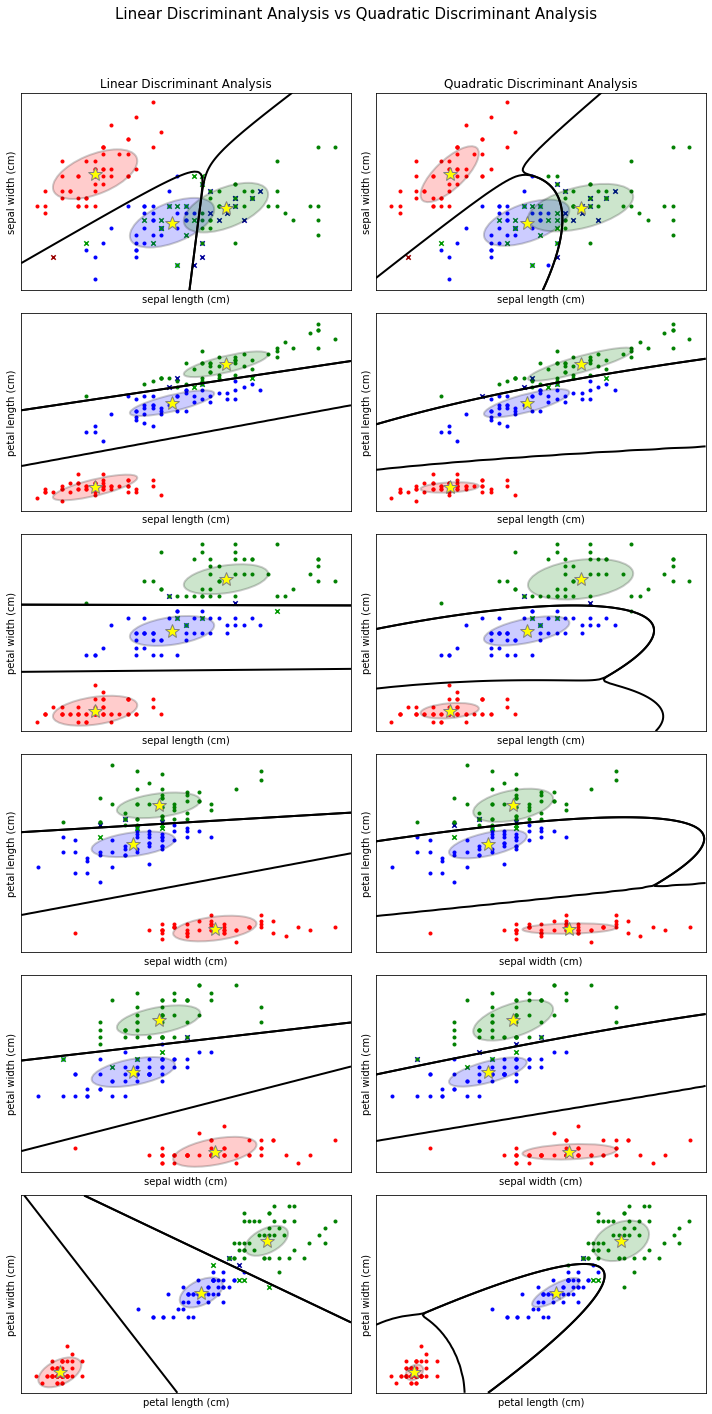

In [106]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# #############################################################################
# Generate datasets
def iris_permutations():
    iris = load_iris()
    X = iris['data']
    y = iris['target']
    datasets = []
    datasets.append((np.c_[X[:,0],X[:,1]],y))
    datasets.append((np.c_[X[:,0],X[:,2]],y))
    datasets.append((np.c_[X[:,0],X[:,3]],y))
    datasets.append((np.c_[X[:,1],X[:,2]],y))
    datasets.append((np.c_[X[:,1],X[:,3]],y))
    datasets.append((np.c_[X[:,2],X[:,3]],y))
    l0 = iris['feature_names'][0]
    l1 = iris['feature_names'][1]
    l2 = iris['feature_names'][2]
    l3 = iris['feature_names'][3]

    labels = [(l0,l1),(l0,l2),(l0,l3),(l1,l2),(l1,l3),(l2,l3)]
    return datasets,labels
# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index,labels):
    splot = plt.subplot(6, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])

    tp = (y == y_pred)  # True Positive
    tp0, tp1,tp2 = tp[y == 0], tp[y == 1],tp[y == 2]
    X0, X1, X2 = X[y == 0], X[y == 1],X[y==2]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
    X2_tp, X2_fp = X2[tp2], X2[~tp2]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue

    # class 2: dots
    plt.scatter(X2_tp[:, 0], X2_tp[:, 1], marker='.', color='green')
    plt.scatter(X2_fp[:, 0], X2_fp[:, 1], marker='x',
                s=20, color='#009900')  # dark green

    # class 0, 1, 2 : discrimination regions
    nx, ny = 100, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='black')
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 2].reshape(xx.shape)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='black')

    
    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[2][0], lda.means_[2][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='black', linewidth=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')
    plot_ellipse(splot, lda.means_[2], lda.covariance_, 'green')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'blue')
    plot_ellipse(splot, qda.means_[2], qda.covariance_[2], 'green')


plt.figure(figsize=(10, 20), facecolor='white')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant Analysis',
             y=0.98, fontsize=15)
permutations,labels = iris_permutations()
for i, (X, y) in enumerate(permutations):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1,labels = labels[i])
    plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2,labels=labels[i])
    plot_qda_cov(qda, splot)
    plt.axis('tight')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# Ejercicio 2. 

* [a)] Ajuste los discriminantes lineales y cuadraticos sobre Iris con las 3 poblaciones. 

* [b)] Ajuste mezcla de Gaussianas para las tres poblaciones. Use la pagina 

https://scikit-learn.org/stable/modules/mixture.html

https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html

https://www.kaggle.com/danielhanchen/gaussian-mixture-models-on-mnist-iris

https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py


* [c)] Ajuste un clasificador del tipo Naive Bayes Gaussiano. 

https://scikit-learn.org/stable/modules/naive_bayes.html

Use la pagina 
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

para armar comparaciones de todos los clasificadores anteriores. 

Diga como estima los parametros en cada caso. 

* [d]  Explique como utilizaria la curva ROC para realizar comparaciones sobre Iris con todos estos clasificadores. 

In [107]:
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB

In [114]:
iris = load_iris()
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# *Respuesta* 

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>

In [117]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)
qda.score(X_test,y_test)

0.9666666666666667

In [118]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
lda.score(X_test,y_test)

1.0

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

Automatically created module for IPython interactive environment


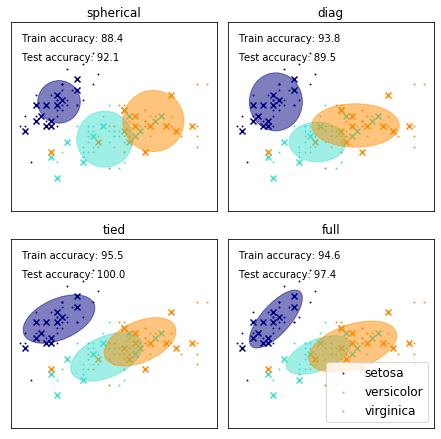

In [124]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('equal', 'datalim')

iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = {cov_type: GaussianMixture(n_components=n_classes,
              covariance_type=cov_type, max_iter=20, random_state=0)
              for cov_type in ['spherical', 'diag', 'tied', 'full']}

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>

In [126]:
gnb = GaussianNB() 
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

0.8333333333333334

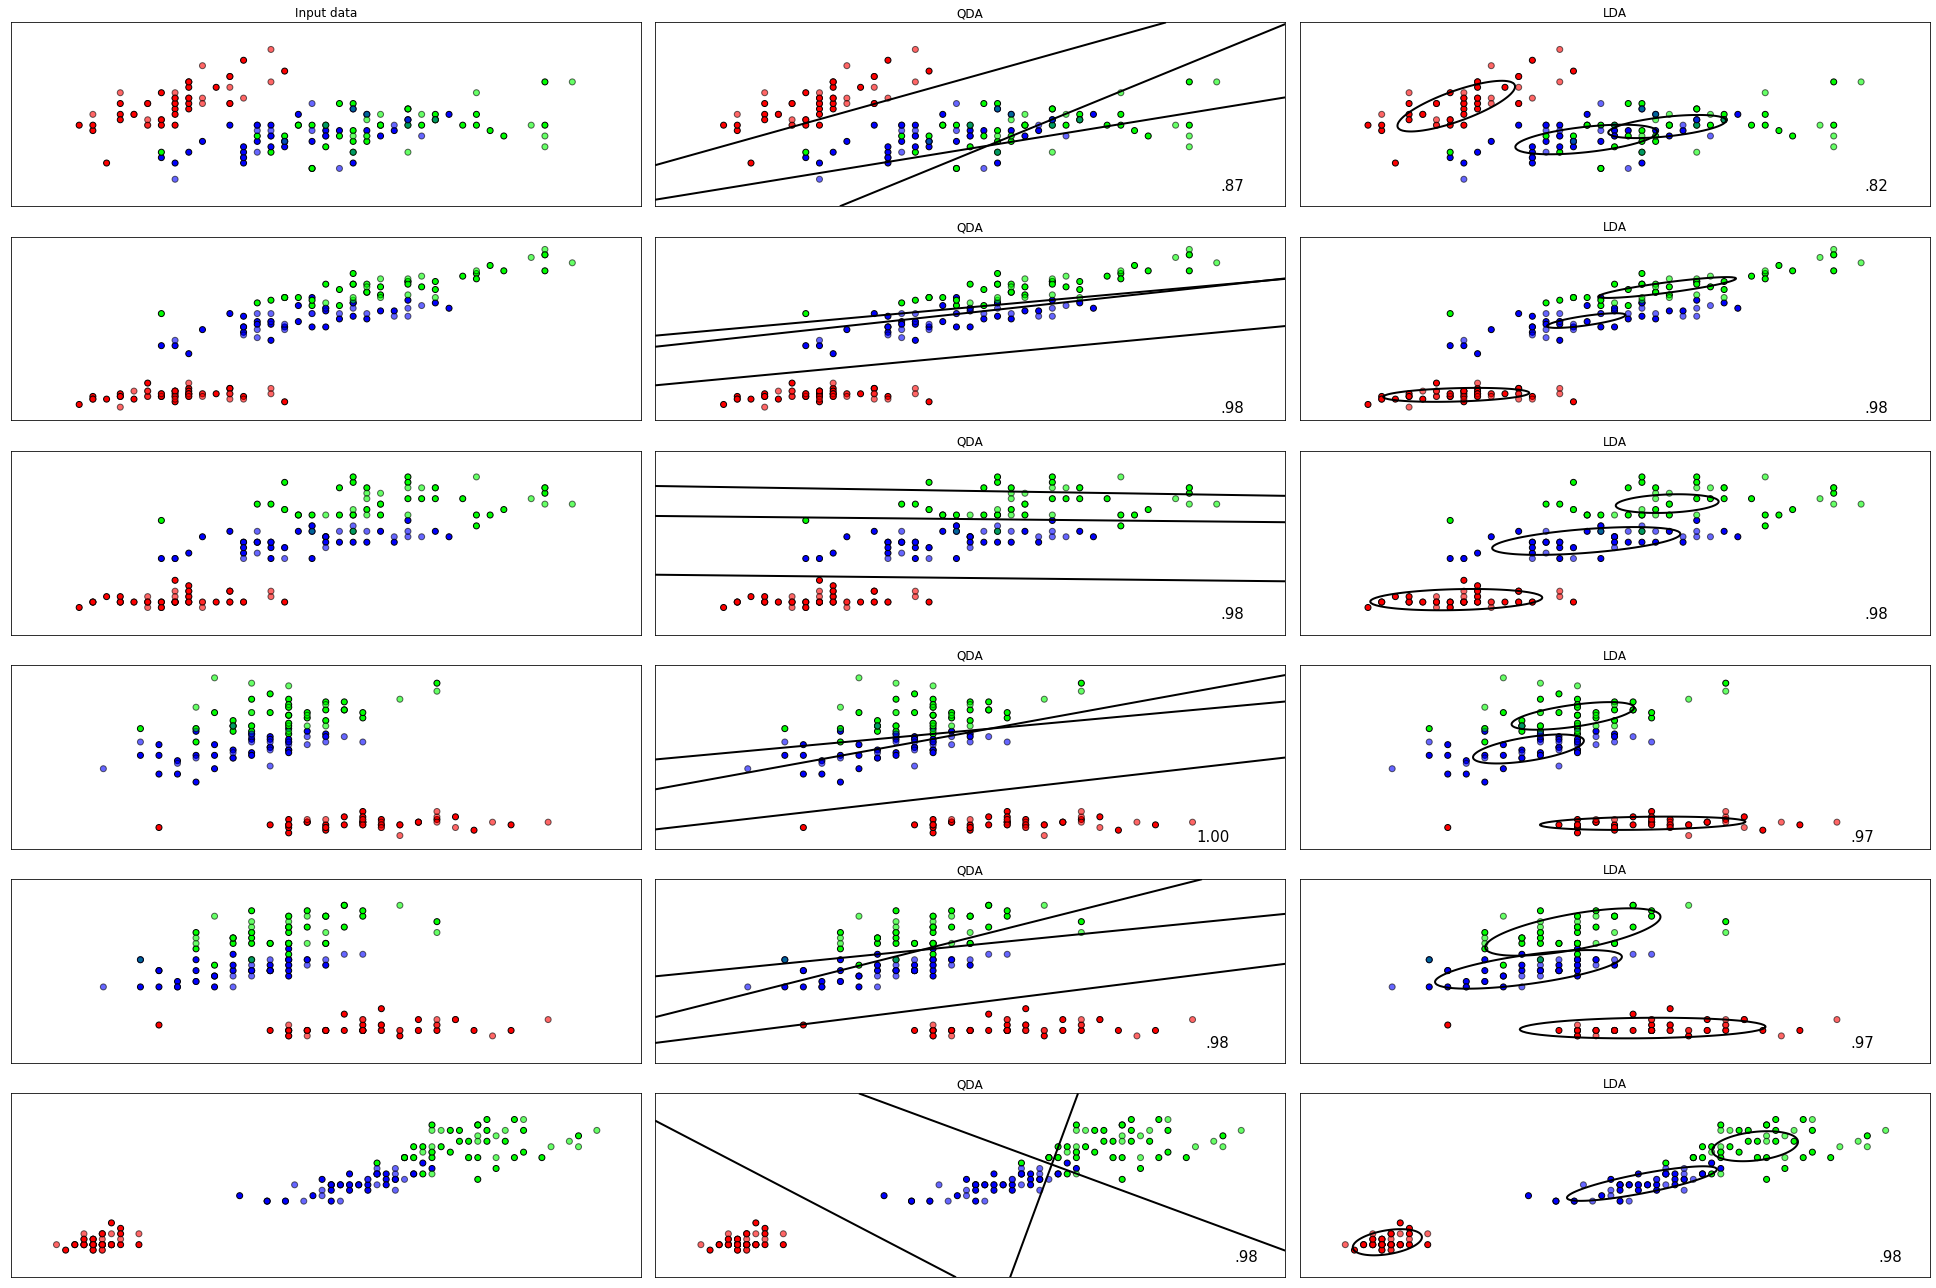

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

h = .02  # step size in the mesh

names = ["QDA","LDA","Mezcla de Gaussianas","NB Gaussiano"]

classifiers = [
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
#     GaussianMixture(),
#     GaussianNB()
]

X, y = load_iris().data,load_iris().target
datasets,_ = iris_permutations()

figure = plt.figure(figsize=(27, 18))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF','#00FF00'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z1= Z[:, 1].reshape(xx.shape)
            plt.contour(xx, yy, Z1, [0.5], linewidths=2., colors='black')
            Z2 = Z[:, 2].reshape(xx.shape)
            plt.contour(xx, yy, Z2, [0.5], linewidths=2., colors='black')
            Z0 = Z[:, 0].reshape(xx.shape)
            plt.contour(xx, yy, Z0, [0.5], linewidths=2., colors='black')
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
            plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='black')

        # Put the result into a color plot

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
#        if ds_cnt == 0:
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

# Ejercicio 3.

Supongamos que la variable $X$ tiene distribución exponencial

$$
	p(x|\theta)=\left\{
	\begin{array}{lcr}
		 \theta e^{-\theta x} & \ &\mbox{ si }x \geq0 \\
		 \ 0 &\ &\mbox{en caso contrario}\\
	\end{array}
	\right.
$$


* [a)] Grafique $p(x|\theta)$ versus $x$ para $\theta=1$. Grafique $p(x|\theta)$ versus $\theta$, $(0 \leq \theta \leq 5)$, para $x = 2$.

* [b)] Suponga que $n$ ejemplos $x_1 , \cdots , x_n$ se generan independientemente de acuerdo a $p(x|\theta)$. Muestre que el estimador de máxima verosimilitud para $\theta$ está dado por
$$\hat{\theta}=\frac{1}{\frac{1}{n}\sum_{k=1}^{n}{x_k}}$$

* [c)] En su gráfico generado con $\theta = 1$ en la parte a), marque el estimador de máxima verosimilitud $\hat{\theta}$ para $n$ grandes.



# *Respuesta* 

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>

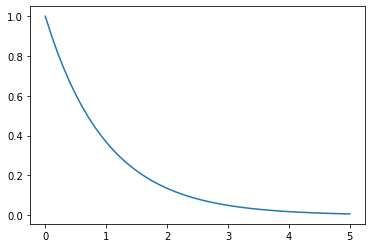

In [74]:
# p(x|theta) en funcion de x
x = np.linspace(0,5)
theta = 1
f = lambda x: theta * np.exp(-theta*x)
plt.plot(x,f(x))


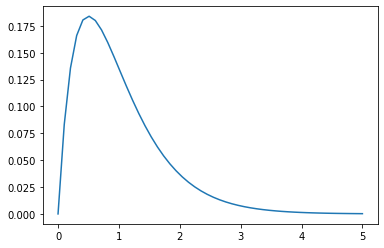

In [91]:
theta = np.linspace(0,5)
x = 2
f = lambda theta: theta * np.exp(-theta*x)
plt.plot(theta,f(theta))


 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

Suponemos que los ejemplos generados responden a una ditribución exponencial, cuya densidad está dada por $f_{\theta}(x)$.
Para el caso continuo, la función de máxima verosimilitud está dada por:
$$
L(\theta) = f_{\theta}(X_{1})\cdot f_{\theta}(X_{2})\cdot\cdot\cdot f_{\theta}(X_{n})
$$
Tenemos que el estimador de maxima verosimilitud es el valor $\hat{\theta}$ es el valor que maximiza $L(\theta)$.
Para nuestro caso entonces,
$$
\begin{equation*}
\begin{split}
L(\lambda) &= (\lambda e^{-\lambda x_{1}})\cdot(\lambda e^{-\lambda x_{2}})\cdot\cdot\cdot(\lambda e^{-\lambda x_{n}})\\\
           &=\lambda^{n}exp(\sum_{i=1}^{n} x_{i})
\end{split}
\end{equation*}
$$
El maximo se alcanza donde la derivada es 0, luego:
$$
\hat{\lambda} = \cfrac{1}{n}\sum_{i=1}^{n} x_{i}
$$

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>

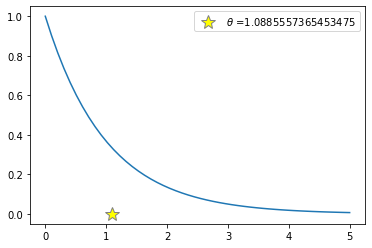

In [89]:
# p(x|theta) en funcion de x
np.random.seed(0)
x = np.linspace(0,5)
theta = 1
muestra_exponencial = np.random.exponential(theta,100)
f = lambda x: theta * np.exp(-theta*x)
thetahat = 1/np.mean(muestra_exponencial)
plt.plot(x,f(x))
plt.plot(thetahat, 0,
         '*', color='yellow', markersize=15, markeredgecolor='grey',label = r'$\theta$ ={}'.format(thetahat))
plt.legend(loc='best')

# Ejercicio 4. 

Supongamos que la variable $X$ tiene distribución uniforme

$$
	p(x|\theta)\thicksim U(0,\theta)=\left\{
	\begin{array}{lcr}
		 {1}/{\theta} 	& \ 		&\mbox{ si }0 \leq x \leq \theta \\
		 \ 0 &\ &\mbox{en caso contrario}\\
	\end{array}
	\right.
$$

* [a)] Suponga que $n$ ejemplos $ D = \{ x_1,\ldots,x_n \} $ son generados independientemente de acuerdo a $p(x|\theta)$. Muestre que el estimador de máxima verosimilitud para $\theta$ es $max[D]$, esto es el valor del máximo elemento de $D$.
* [b)] Suponga que son generados $n=5$ puntos acorde con esta distribución y el maximo valor de esos puntos es  ${\max}_k (x_k)=0.6$. Grafique la verosimilitud $p(D|\theta)$ en el rango $0 \leq \theta \leq 1$. Explique con palabras por que no es necesario conocer los otros 4 puntos.



# *Respuesta* 

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>

Tenemos que el estimador de maxima verosimilitud es el que maximiza la función de maxima verosimilitud. En el caso de v.a. uniforme, la funcion de densidad esta dada por $p(x|\theta)=\cfrac 1\theta I_{(0\le x\le \theta)}(x)$ donde $I_{(0\le x\le \theta)}$ es la función indicadora.
La función que debemos maximizar es:
$$
\begin{equation*}
\begin{split}
L(\theta) &= \cfrac 1\theta I_{(0\le x_{1}\le \theta)}(x_{1}) \cdot\cdot\cdot \cfrac 1\theta I_{(0\le x_{n}\le \theta)}(x_{n})\\
&= \prod_{k=1}^{n}\cfrac 1\theta I_{(0\le x_{k}\le \theta)}(x_{k})\\
&= \cfrac{1}{\theta^{n}}I_{max_{k}x_{k} \le \theta}\cdot I_{min_{k}x_{k} \ge \theta}
\end{split}
\end{equation*}
$$
Como $1/\theta^{n}$ decrece a medida que $\theta$ crece, y además $I_{max_{k}x_{k} \le \theta} = 0 \iff \theta \le max(x_{k})$, la funcion toma su máximo en $\hat{\theta} = max(x_{k})$

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

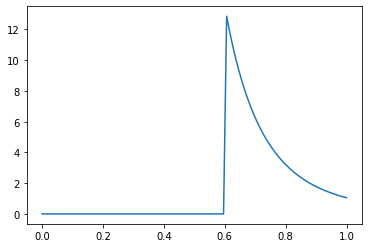

In [94]:
fig,ax = plt.subplots()
theta = np.linspace(0,1,100)
theta_mv = np.zeros(100)
for j in range(60,100):
    theta_mv[j] = (100/j)**5
ax.plot(theta,theta_mv)

# Ejercicio 5


Considere los modelos de clasificación con densidad Gaussiana en diferentes dimensiones:

* [a)] Escriba un programa para encontrar los valores de maxima verosimilitud $\hat\mu$ y $\hat\sigma^2$. Aplique su programa individualmente para cada una de las tres caracteristica $x_i$ de la categoria $w_1$ de la Tabla que se levanta como datos.data.

* [b)] Modifique su programa para aplicarlo a datos Gaussianos bidimensionales $p(x)\sim N(\mu,\Sigma)$. Aplique su programa para cadas una de las tres formas de apareamiento de a dos caracteristicas para $w_1$.
* [c)] Modifique su programa para aplicarlo a datos Gaussianos de tres dimensiones. Aplique su programa para a las tres dimensiones de la categoria $w_1$.
* [d)] Asuma que su modelo de tres dimensiones es separable, por lo tanto $\Sigma=diag(\sigma_1^2,\sigma_2^2,\sigma_3^2)$. Escriba un programa para estimar la media y los componentes diagonales de $\Sigma$. Aplique el programa a los datos en $w_2$.
* [e)] Compare los resultados para la media de cada caracteristica $\mu_i$ calculada en las formas previas. Explique por que son iguales o diferentes.
* [f)] Compare sus resultados para la varianza de cada caracteristica $\sigma_i^2$ calculada de las formas previas. Explique por que los resultados son iguales o diferentes.


# *Respuesta* 

In [172]:
import pandas as pd

df = pd.read_csv('datos.data',skiprows=1)
df

,x1,x2,x3,x1.1,x2.1,x3.1,x1.2,x2.2,x3.2
0,0.420,-0.087,0.58,-0.400,0.580,0.0890,0.830,1.600,-0.014
1,-0.200,-3.300,-3.40,-0.310,0.270,-0.0400,1.100,1.600,0.480
2,1.300,-0.320,1.70,0.380,0.055,-0.0350,-0.440,-0.410,0.320
3,0.390,0.710,0.23,-0.150,0.530,0.0110,0.047,-0.450,1.400
4,-1.600,-5.300,-0.15,-0.350,0.470,0.0340,0.280,0.350,3.100
5,-0.029,0.890,-4.70,0.170,0.690,0.1000,-0.390,-0.480,0.110
6,-0.230,1.900,2.20,-0.011,0.550,-0.1800,0.340,-0.079,0.140
7,0.270,-0.300,-0.87,-0.270,0.610,0.1200,-0.300,-0.220,2.200
8,-1.900,0.760,-2.10,-0.065,0.490,0.0012,1.100,1.200,-0.460
9,0.870,-1.000,-2.60,-0.120,0.054,-0.0630,0.180,-0.110,-0.490


 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>

In [161]:
import numpy as np
def estimar_mu_sigma(x):
    n = len(x)
    mu = np.mean(x)
    sigma = sum((x - mu)**2)/n
    return mu,sigma

In [178]:
print("La media y varianza estimadas para cada caracteristica son:")
df[['x1','x2','x3']].apply(estimar_mu_sigma)

La media y varianza estimadas para cada caracteristica son:


x1    (-0.07089999999999999, 0.9061772900000001)
x2                  (-0.6047, 4.200714809999999)
x3      (-0.9109999999999999, 4.541949000000001)
dtype: object

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

In [232]:
def estimar_mu_sigma_2(x):
    n = len(x)
    mu = np.array([np.mean(x[:,0]),np.mean(x[:,1])])
    vcov = np.cov(x,ddof=0,rowvar=False)
    return mu,vcov

In [233]:
combinaciones = [['x1','x2'],['x1','x3'],['x2','x3']]
estimaciones = []
for columnas in combinaciones:
    x = np.c_[df[columnas[0]],df[columnas[1]]]
    mu, vcov = estimar_mu_sigma_2(x)
    estimaciones.append(estimar_mu_sigma_2(x))
    print("Para {}, mu estimado: {}".format(columnas,mu))
    print("Matriz de varianza covarianzas:")
    print(vcov)

Para ['x1', 'x2'], mu estimado: [-0.0709 -0.6047]
Matriz de varianza covarianzas:
[[0.90617729 0.56778177]
 [0.56778177 4.20071481]]
Para ['x1', 'x3'], mu estimado: [-0.0709 -0.911 ]
Matriz de varianza covarianzas:
[[0.90617729 0.3940801 ]
 [0.3940801  4.541949  ]]
Para ['x2', 'x3'], mu estimado: [-0.6047 -0.911 ]
Matriz de varianza covarianzas:
[[4.20071481 0.7337023 ]
 [0.7337023  4.541949  ]]


 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>

In [234]:
def estimar_mu_sigma_3(x):
    n = len(x)
    mu = np.array([np.mean(x[:,0]),np.mean(x[:,1]),np.mean(x[:,2])])
    vcov = np.cov(x,ddof=0,rowvar=False)
    return mu,vcov

In [236]:
print("La media y matriz de varianza covarianza estimada por maxima verosimilitud es:")
estimar_mu_sigma_3(np.c_[df[['x1','x2','x3']]])

La media y matriz de varianza covarianza estimada por maxima verosimilitud es:


(array([-0.0709, -0.6047, -0.911 ]),
 array([[0.90617729, 0.56778177, 0.3940801 ],
        [0.56778177, 4.20071481, 0.7337023 ],
        [0.3940801 , 0.7337023 , 4.541949  ]]))

 <span style="color:red"> RESPONDA EL INCISO D AQUÍ </span>

In [239]:
def estimar_mu_sigma_3(x):
    n = len(x)
    mu = np.array([np.mean(x[:,0]),np.mean(x[:,1]),np.mean(x[:,2])])
    vcov = np.cov(x,ddof=0,rowvar=False)
    return mu,vcov
print("La media y matriz de varianza covarianza estimada por maxima verosimilitud para w2 es:")
estimar_mu_sigma_3(np.c_[df[['x1.1','x2.1','x3.1']]])

La media y matriz de varianza covarianza estimada por maxima verosimilitud para w2 es:


(array([-0.1126 ,  0.4299 ,  0.00372]),
 array([[ 0.05392584, -0.01465126, -0.00517993],
        [-0.01465126,  0.04597009,  0.00850987],
        [-0.00517993,  0.00850987,  0.00726551]]))

In [245]:
print("La matriz de varianza-covarianza asumiendo separabilidad")
var_w2_x1 = np.var(df['x1.1'])
var_w2_x2 = np.var(df['x2.1'])
var_w2_x3 = np.var(df['x3.1'])

sigma = np.diag([var_w2_x1,var_w2_x2,var_w2_x3])
sigma

La matriz de varianza-covarianza asumiendo separabilidad


array([[0.05392584, 0.        , 0.        ],
       [0.        , 0.04597009, 0.        ],
       [0.        , 0.        , 0.00726551]])

 <span style="color:red"> RESPONDA EL INCISO E AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO F AQUÍ </span>

# Ejercicio 6 

Considere la estimación Bayesiana de la media de una distribucion Gaussiana unidimensional. Suponga una distribución a priori $p(\mu)\sim N(\mu_0,\sigma_0)$

* [a)] Calcule con todos los pasos $p(\mu|D)$ y $p(x|D)$ en el caso Gaussiano unidimensional donde $\mu$ es desconocida, determinando cual es la densidad reproductora y cual es el prior conjugado. Diga cual es el dogmatismo, es decir, el balance entre el conocimiento previo y el conocimiento emprírico proveniente de los datos. Obtenga esta información del libro. Tiene a su disposición una versión .djvu completa y pdf del capitulo 3. 

* [b)] Escriba un programa que dibuje la densidad $p(x|D)$ dado $\mu_0, \sigma_0,\sigma$ y la muestra de entrenamiento $D=\{x_1,\cdots, x_n\}$, 

* [c)] Estime $\sigma$ para la componente $x_2$ de la muestra $\omega_3$ de la tabla anterior. Suponga que $\mu_0=-1$, grafique $p(x|D)$ para cada uno de los siguientes dogmatismos $\sigma^2/\sigma_0^2= 0.1,1,10,100$. 

 # *Respuesta*   <font color = 'RED'> estudiar esta respuesta </font>


* [a)] Consideramos la estimación bayesiana de la media de una distribución Gaussiana unidimensional, donde la distribución a priori de esta media es también gaussiana: $p(\mu) \sim N(\mu_0, \sigma_0)$.

Dada una muestra $\mathcal D = \{x_1, x_2, \dots, x_n\}$, tenemos entonces que
$$p(x_i | \mu) = \frac 1{\sqrt{2\pi}\sigma} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}, \qquad \sigma \mbox{ conocida}.$$

La estimación a posteriori de $\mu$ dada la muestra $\mathcal D$ está dada por 
$$p(\mu|\mathcal D) = \frac{p(\mathcal D | \mu) p(\mu)} { \int p(\mathcal D | \mu)p(\mu) d\mu}.$$

Denotamos $\alpha = p(\mathcal D)^{-1}$, esto es:
$$\alpha = \frac 1{ \int p(\mathcal D | \mu)p(\mu) d\mu}.$$
Por otra parte, como la muestra $\mathcal D$ es de observaciones independientes su probabilidad es el producto de las probabilidades individuales. Así resulta:
$$p(\mu|\mathcal D) =\alpha \, p(\mathcal D | \mu) p(\mu) = \alpha \left( \prod_{i=1}^n p(x_i | mu)\right) \cdot p(\mu).$$

Luego,
\begin{eqnarray}
p(\mu|\mathcal D)  &=& \alpha \left(  \prod_{i=1}^n \frac 1{\sqrt{2\pi}\sigma} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}
\right)\, \frac 1{\sqrt{2\pi}\sigma_0} e^{-\frac{(\mu-\mu_0)^2}{2\sigma_0^2}} = \frac{\alpha}{(2\pi)^{(n+1)/2}\sigma\sigma_0} \left(  \prod_{i=1}^n e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}
\right)\, e^{-\frac{(\mu-\mu_0)^2}{2\sigma_0^2}}
\end{eqnarray}
Sumamos los exponentes en las $(n+1)$ exponenciales y resulta:

\begin{eqnarray}
-\left(\sum_{i=1}^n \frac{(x_i-\mu)^2}{2\sigma^2} \right)-\frac{(\mu-\mu_0)^2}{2\sigma_0^2} &=& -\frac 12
\left(\sum_{i=1}^n \frac{(x_i-\mu)^2}{\sigma^2} \right)+\frac{(\mu-\mu_0)^2}{\sigma_0^2}  
\\
&=&
-\frac 12 \left( \sum_{i=1}^n \frac {x_i^2}{\sigma^2} - 2 \sum_{i=1}^n \frac{x_i \mu}{\sigma^2} + n \frac{\mu^2}{\sigma^2} + \frac{\mu^2}{\sigma_0^2} - 2\frac{\mu_0\mu}{\sigma_0^2} + \frac{\mu_0^2}{\sigma_0^2}\right)
\\
&=&
-\frac 12 \left( \sum_{i=1}^n \frac {x_i^2}{\sigma^2} + \frac{\mu_0^2}{\sigma_0^2}\right) - \frac 12 
\left( \left( \frac n{\sigma^2} + \frac 1{\sigma_0^2} \right) \mu^2 - 2 \left(   \sum_{i=1}^n \frac{x_i \mu}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}\right) \mu \right) \\
&=&
A + B + C
\end{eqnarray}
El término $A$ no depende de $\mu$ por lo que $e^A$ lo agrupamos con $\alpha$.

Los términos $B$ y $C$ pueden completarse para formar el cuadrado de un binomio:
$$ \left( \frac n{\sigma^2} + \frac 1{\sigma_0^2} \right) \mu^2 - 2 \left(   \sum_{i=1}^n \frac{x_i}{\sigma^2} + \frac{\mu_0}{\sigma_0^2}\right) \mu  = 
a \mu^2 - 2b \mu = a \left( \mu^2 -2\frac ba \mu + \left(\frac ba\right)^2 -  \left(\frac ba\right)^2\right) 
= \frac{ (\mu - \frac ba)^2}{1/a} - \frac{b^2}a
$$
donde
$$a = \frac n{\sigma^2} + \frac 1{\sigma_0^2}, \qquad b =  \sum_{i=1}^n \frac{x_i}{\sigma^2} + \frac{\mu_0}{\sigma_0^2} = \frac n{\sigma^2} \,\overline x  + \frac{\mu_0}{\sigma_0^2}. \qquad \overline x = \frac 1n \sum_{i=1}^n x_i.$$

Así resulta que la densidad reproductura $p(\mu|\mathcal D)$ es una densidad normal con media:
$$\mu_n = \frac ba = \frac {\frac n{\sigma^2} \,\overline {x_n}  + \frac{\mu_0}{\sigma_0^2}}{\frac n{\sigma^2} + \frac 1{\sigma_0^2}} = \frac{n \overline {x_n} \sigma_0^2 + \mu_0\sigma^2}{n\sigma_0^2 + \sigma^2}$$
 y varianza
 $$ \sigma_n = \frac{n\sigma_0^2 + \sigma^2}{\sigma^2 \sigma_0^2},$$
 siendo $\overline{x_n}$ la media muestral de los $n$ datos observados.
 
 ### Cálculo de $p(x|\mathcal D)$
 
\begin{eqnarray}
p(x | \mathcal D) &=& \int p(x |\mu)p(\mu|\mathcal D) d\mu \\
&=&\int \frac 1{\sqrt{2\pi}\sigma} e^{-\frac{(x-\mu)^2}{2\sigma^2}}\,\frac 1{\sqrt{2\pi}\sigma_n} e^{-\frac{(\mu-\mu_n)^2}{2\sigma_n^2}}\,d\mu \\
&=&
{}\frac 1{2\pi\sigma\sigma_n}\int \exp\left(
-\frac{(x-\mu)^2}{2\sigma^2}-\frac{(\mu-\mu_n)^2}{2\sigma_n^2}\right)\, d\mu \\
&=&
{}\frac 1{2\pi\sigma\sigma_n}\int \exp\left(
-\frac{\sigma_n^2(x^2-2\mu x + \mu^2)}{2\sigma^2\sigma_n^2}
-\frac{\sigma^2(\mu^2-2\mu\mu_n+\mu_n^2)}{2\sigma_n^2\sigma^2}\right)\, d\mu \\
&=&
{}\frac 1{2\pi\sigma\sigma_n}\int \exp\left(
-\frac{(\sigma_n^2+ \sigma^2)\mu^2 - 2\mu (x\sigma_n^2  +\sigma^2\mu_n) + \sigma_n^2x^2 + \sigma^2\mu_n^2}{2\sigma_n^2\sigma^2}\right)\, d\mu \\
&=&
\frac 1{2\pi\sigma\sigma_n}
\int \exp\left(- \frac{(\mu - \frac{x\sigma_n^2  +\sigma^2\mu_n}{\sigma_n^2 + \sigma^2})^2}{\frac{2\sigma_n^2\sigma^2}{\sigma_n^2 + \sigma^2}} \right)d\mu \exp\left(
\frac{x^2 \sigma^2 + \sigma_n^2\mu_n^2 - \frac{(x\sigma^2 + \mu_n\sigma_n^2)^2}{\sigma^2 + \sigma_n^2}}{\sigma^2\sigma_n^2}
\right)
\end{eqnarray}

La integral respecto de $\mu$ es proporcional a la integral de la densidad de una normal, con media y desvío estándar dado por:
$$\mu_1 = \frac{x\sigma_n^2  +\sigma^2\mu_n}{\sigma_n^2 + \sigma^2} \qquad 
\sigma_1 =\frac{2\sigma_n^2\sigma^2}{\sigma_n^2 + \sigma^2}. $$
Por lo tanto es igual a $\sqrt{2\pi}\sigma_1$, que es independiente del valor de $x$:

Resolvemos el otro factor observando que:
\begin{eqnarray}
x^2 \sigma^2 + \sigma_n^2\mu_n^2 - \frac{(x\sigma^2 + \mu_n\sigma_n^2)^2}{\sigma^2 + \sigma_n^2}
&=& \frac{1}{\sigma^2 + \sigma_n^2} \left( x^2 \sigma^4 + x^2 \sigma^2 \sigma_n^2 + \sigma^2 \sigma_n^2 \mu_n^2 + \sigma_n ^4 \mu_n ^2 - x^2\sigma^4 - \mu_n^2 \sigma_n^4 - 2x\sigma^2 \mu_n \sigma_n^2\right)\\
&=&
\frac{\sigma^2 \sigma_n^2}{\sigma^2 + \sigma_n^2} \left(x^2 - 2x \mu_n + \mu_n^2\right) = \frac{\sigma^2 \sigma_n^2}{\sigma^2 + \sigma_n^2}(x-\mu_n)^2.
\end{eqnarray}

Juntando resultados concluimos que $p(x|\mathcal D)$ tiene distribución normal con media y desvío estándar dados por:
$$\mu_x = \mu_n, \qquad \sigma^2_x = \sigma^2 + \sigma_n^2$$
 
 ### Dogmatismo
 $$\frac{\sigma^2}{\sigma_0^2}$$
 





 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

In [262]:
from scipy.stats import norm
def plot_p_x_D(mu0,sigma0,sigma,D,**kw):
    n = len(D)
    x_barra = np.mean(D)
    const = (n*(sigma0**2)+sigma**2)
    sigma_n_cuad = ((sigma0**2)*(sigma**2))/const
    mu_n = ((n*(sigma0**2))/const)*x_barra+((sigma**2)/const)*mu0
    sigma_x_cuad = sigma_n_cuad + sigma**2
    mu_x = mu_n
    x = np.linspace(-5,5)
    plt.plot(x,norm(mu_x,sigma_x_cuad).pdf(x),**kw)


 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>

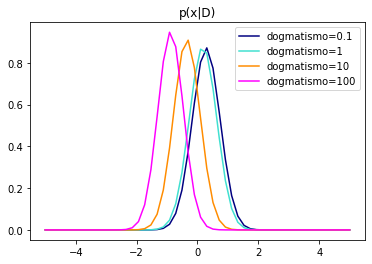

In [264]:
data = df['x2.2']
mu0 = -1
sigma = np.var(data)
dogmatismos = [0.1,1,10,100]
colors = ['navy', 'turquoise', 'darkorange','magenta']
for d,c in zip(dogmatismos,colors):
    sigma0 = np.sqrt((sigma**2)/d)
    plot_p_x_D(mu0,sigma0,sigma,data,c=c,label='dogmatismo={}'.format(d))
    plt.legend(loc='best')
    plt.title('p(x|D)')

# Ejercicio 7

Considerar las tasas de error en diferentes dimensiones

* [a)] Use maxima verosimilitud para entrenar un dicotomizador Gaussiano usando los datos tridimensionales de las categorias $w_1$ y $w_2$ en la Tabla. Integre numéricamente para estimar la proporcion del error.
* [b)] Ahora considere los datos proyectados en un subespacio bidimensional. Para cada uno de los tres subespacios - definidos por $x_1=0$, $x_2=0$ o $x_3=0$- entrene un dicotomizador Gaussiano. Integre numericamente para estimar la proporcion del error.
* [c)] Ahora considere los datos proyectados en subespacios unidimensionales, definidos por cada uno de los tres ejes. Entrene un clasificador Gaussiano e integre numericamente para estimar la proporcion del error.
* [d)] Discuta el orden del rango de las tasas de error encontrado.
* [e)] Asumiendo que reestima la distribucion en las diferentes dimensiones, es el error de Bayes  mayor en los espacios proyectados?


# *Respuesta* 

 <span style="color:red"> RESPONDA EL INCISO A AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO B AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO C AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO D AQUÍ </span>

 <span style="color:red"> RESPONDA EL INCISO E AQUÍ </span>